In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../DataSet.csv")

In [3]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Delta,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,273,0
1,1,0.067,2,0,0,0,0,0,58,334,434,-100,0
2,1,0.000,0,0,0,0,0,0,44,539,364,175,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,2812,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,-900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000,2,2,0,1,0,0,8,661,1562,-901,1
1196,0,0.000,0,0,0,0,0,0,0,2,223,-221,1
1197,1,0.000,2,58,0,1,0,0,47,296,4909,-4613,1
1198,1,0.143,1,0,0,1,0,0,0,5,67,-62,1


In [5]:
X=df.iloc[:, 0:12].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0.,   0., 102., 678., 405.,
       273.])

In [6]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,1
1197,1
1198,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

804 804
396 396


In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(clf.fit(X_train, y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [9]:
print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

TRAIN SET 1.0
TEST  SET 0.9646464646464646


In [10]:
print("Errori in training set")
predictions = clf.predict(X_train)
for elem, prediction, label in zip(X_train, predictions, y_train):
  if prediction != label:
    print(elem, 'has been classified as ', prediction, 'and should be ', label) 

Errori in training set
[ 1.00e+00  1.82e-01  2.00e+00  6.30e+01  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  9.00e+00  7.87e+02  9.49e+02 -1.62e+02] has been classified as  0 and should be  Fake


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[195   6]
 [  8 187]]


In [13]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y.values.ravel(), cv=4))

[0.92666667 0.96333333 0.96       0.96      ]


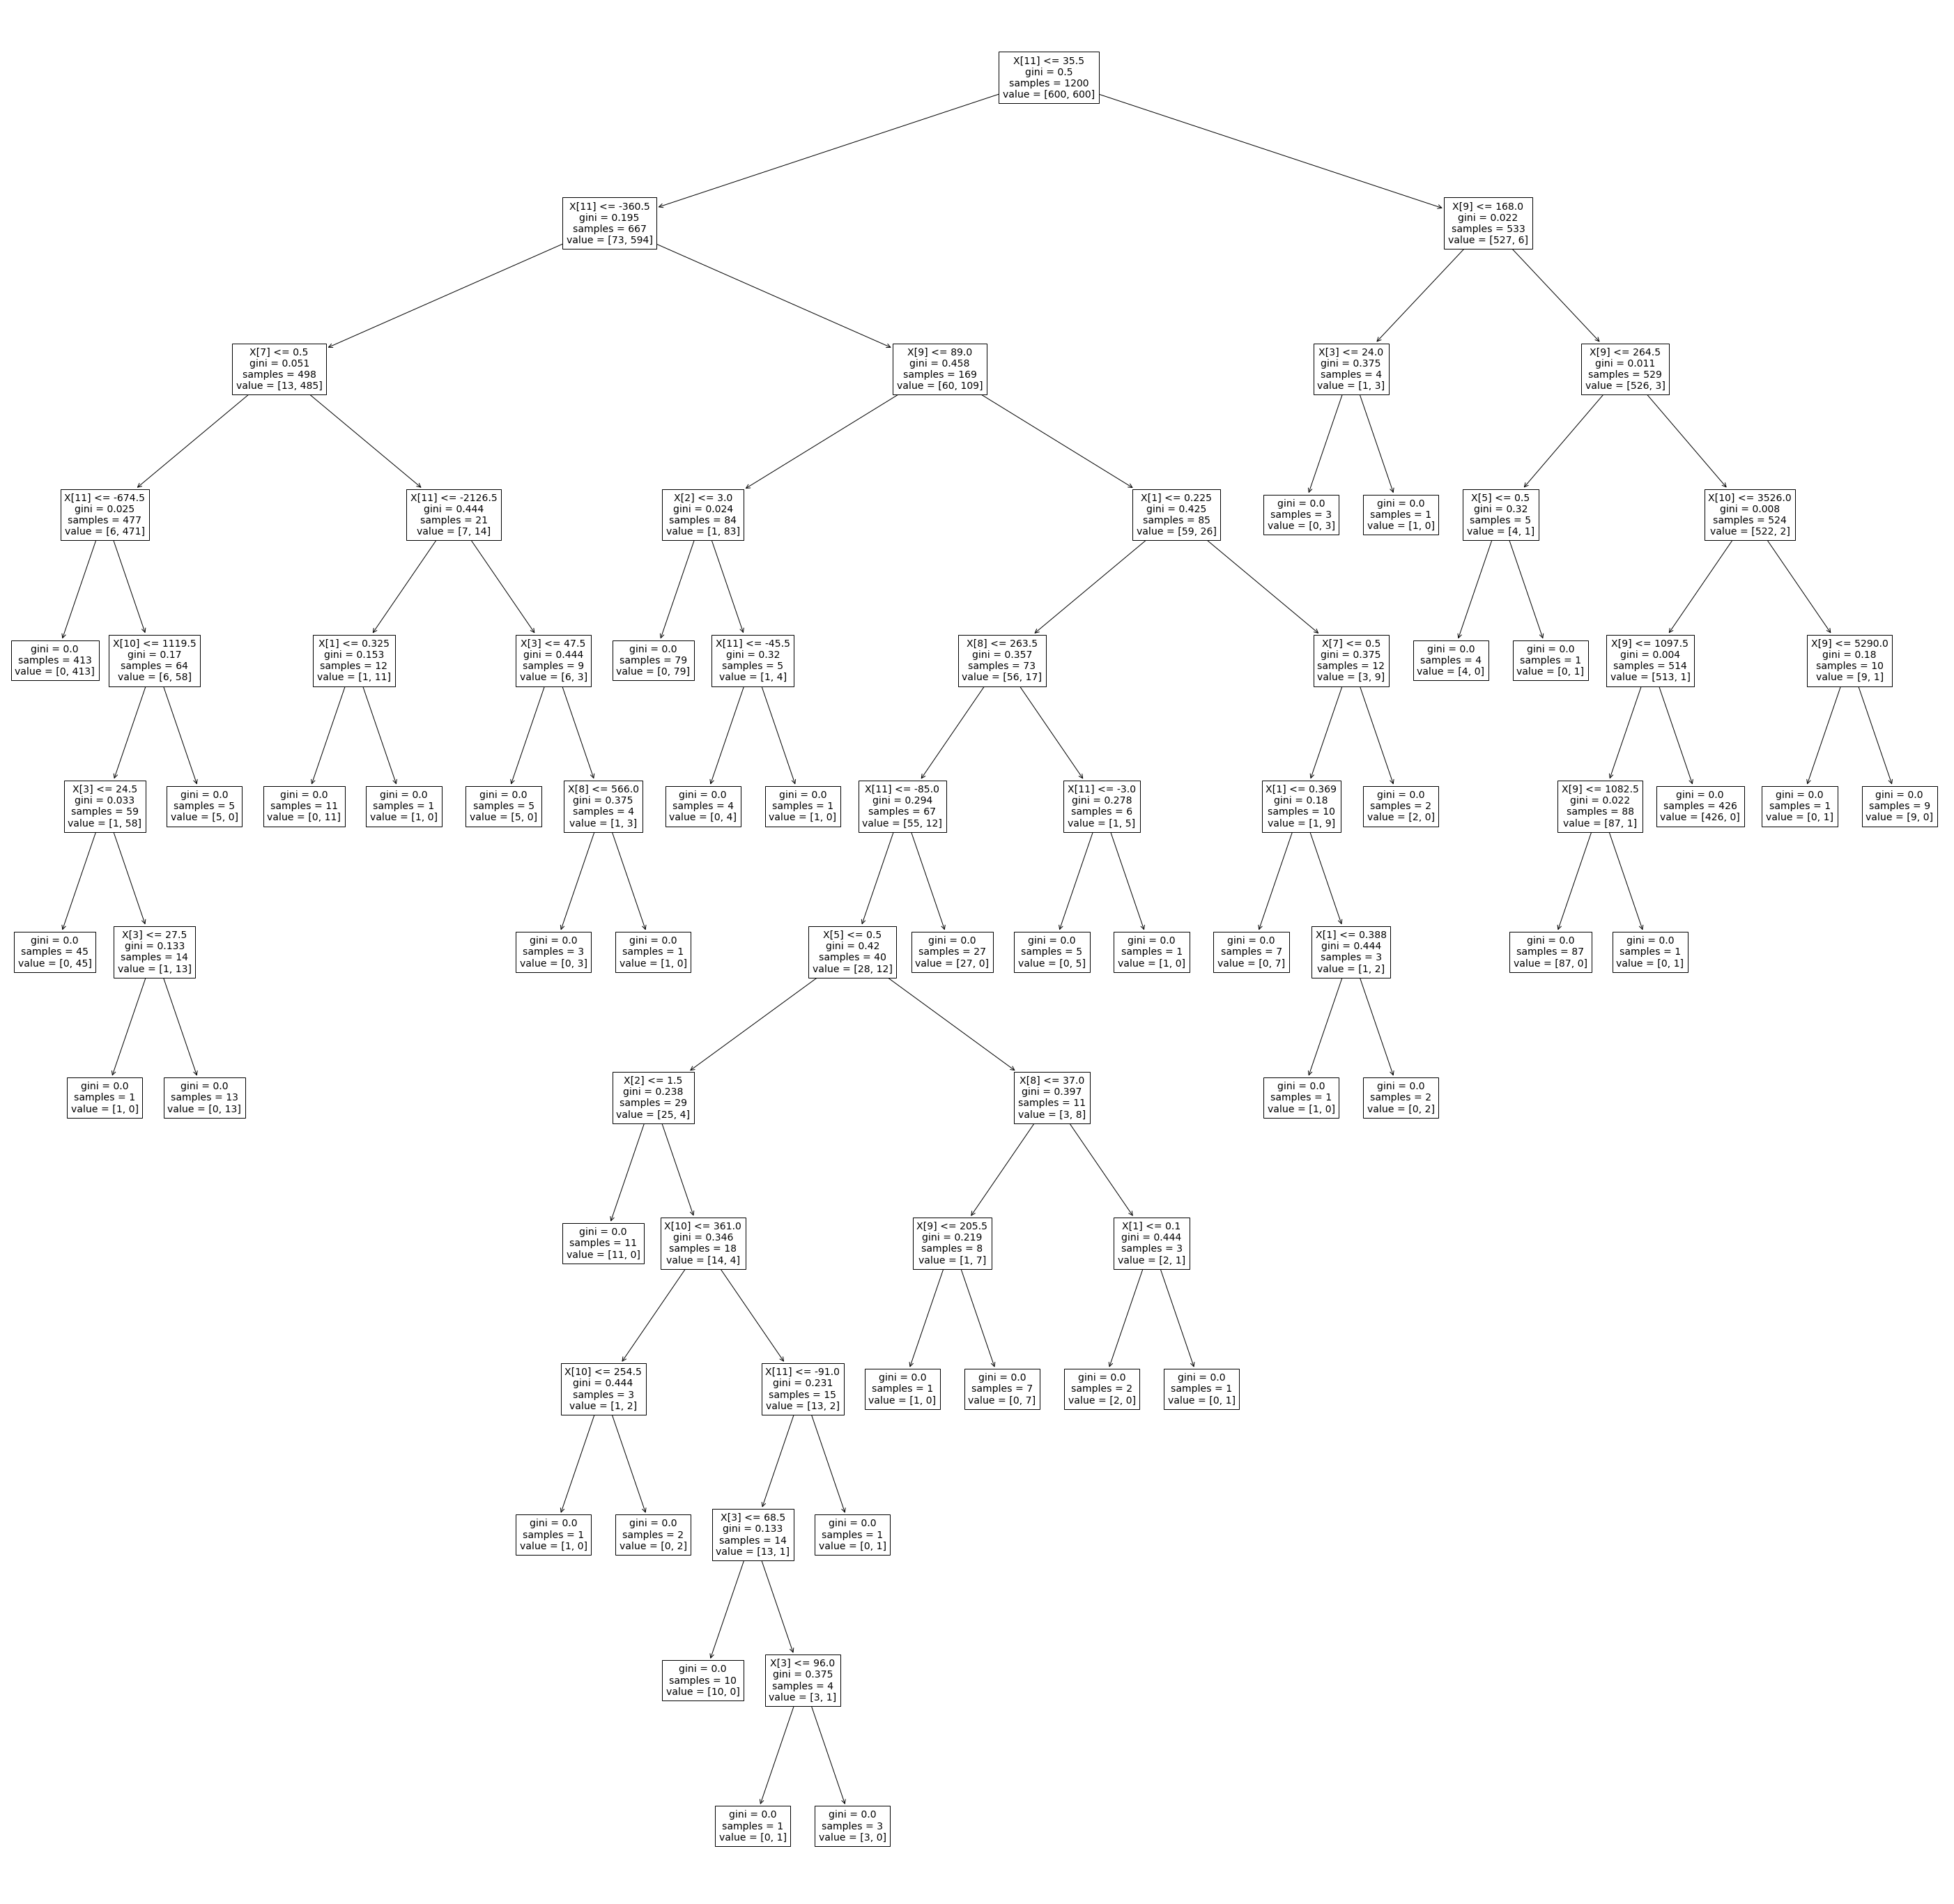

In [15]:
tree.plot_tree(clf.fit(X,y)) 
fig = clf.fit(X,y)
tree.plot_tree(fig)
plt.rcParams["figure.figsize"] = [60,60]
plt.show()